<a href="https://colab.research.google.com/github/Vishalbangari/Spark-Foundation-tasks/blob/main/Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Author -Bangari Vishal**

### **GRIP - The Sparks Foundation**

### **Data Science and Bussiness Analytics Intern**

### **Task 2 : Prediction using Unsupervised ML**

### Algorithm used here : K-Means Clustering

In [1]:
#Importing all the necessary libraries

%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [2]:
#Loading the dataet
df=pd.read_csv('/content/drive/MyDrive/Ipynb & Csv & Zip Files/1_iris.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
df.shape

(150, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

### We can see that there are no Null Valus in the dataset

In [7]:
df.drop_duplicates(inplace=True)

K-Means Clustering is an Unsupervised Learning algorithm, which groups the unlabeled dataset into different clusters.
Here K defines the number of pre-defined clusters in the iris dataset that needed to be created in the process, as if K=4, there will be four clusters, and so on.

In [8]:
#Label Encoding

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['species']=le.fit_transform(df['species'])
df['species'].value_counts()

1    50
2    49
0    48
Name: species, dtype: int64

Plot the estimated number of clusters

Text(0.5, 1.0, 'K-Means Clustering')

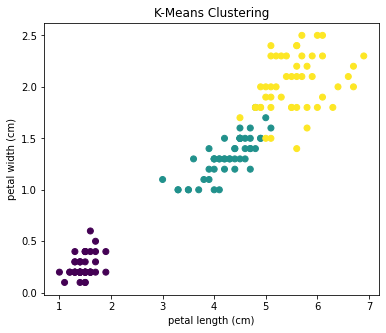

In [9]:
plt.figure(figsize=(6,5))
plt.scatter(df['petal_length'],df['petal_width'],c=df.species.values)
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)');
plt.title('K-Means Clustering')

In [10]:
#Correlation between this  columns
df.corr()

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.109321,0.871305,0.817058,0.782904
sepal_width,-0.109321,1.000000,-0.421057,-0.356376,-0.418348
petal_length,0.871305,-0.421057,1.000000,0.961883,0.948339
petal_width,0.817058,-0.356376,0.961883,1.000000,0.955693
species,0.782904,-0.418348,0.948339,0.955693,1.000000


##Data Visualization

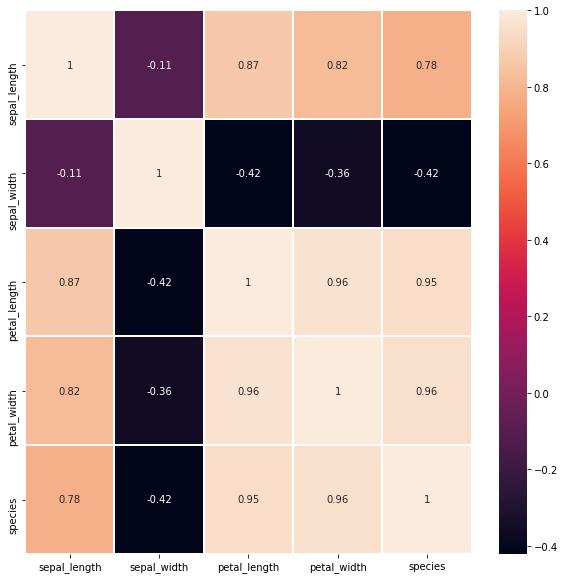

In [11]:
fig=plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),linewidths=1,annot=True)

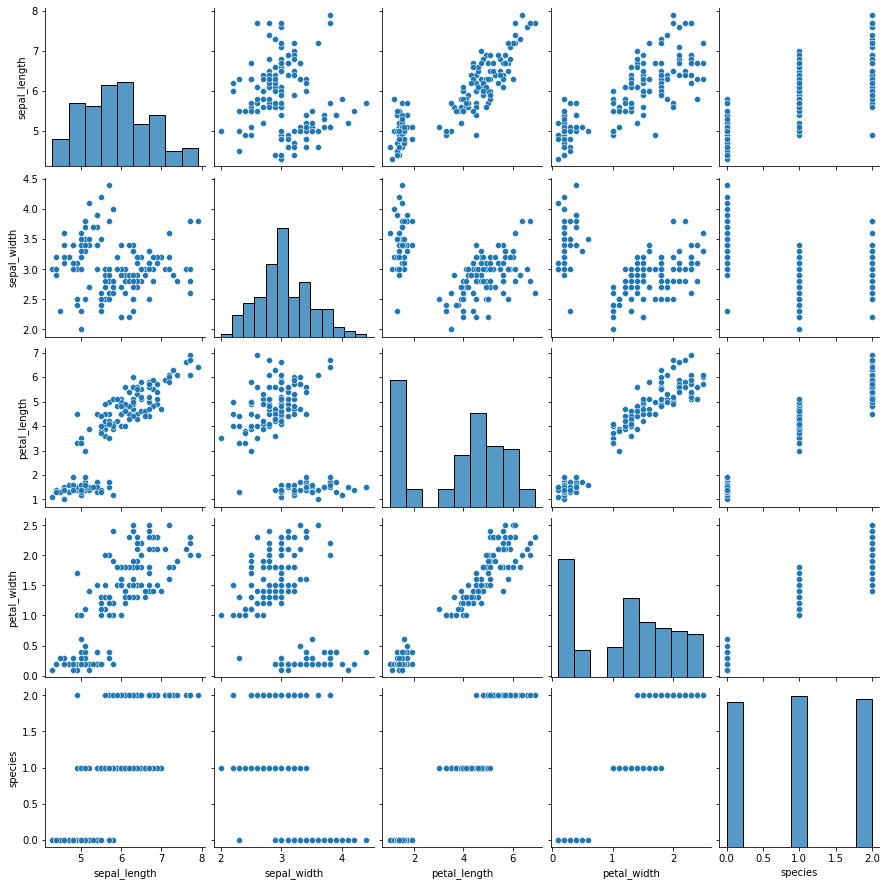

In [12]:
sns.pairplot(df)


In [14]:
x=df.iloc[:,[0,1,2,3]].values
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(x)
    sse.append(km.inertia_)

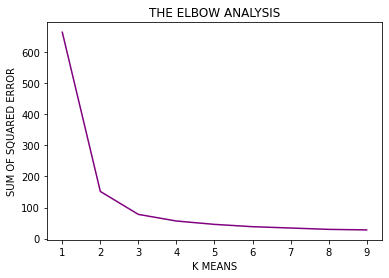

In [15]:
plt.xlabel('K MEANS')
plt.ylabel('SUM OF SQUARED ERROR')
plt.title('THE ELBOW ANALYSIS')
plt.plot(k_rng,sse,color='purple')

In [16]:
km = KMeans(n_clusters=3)
y_predict = km.fit_predict(x)
y_predict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [17]:
df['cluster']=y_predict
df

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,2
146,6.3,2.5,5.0,1.9,2,0
147,6.5,3.0,5.2,2.0,2,2
148,6.2,3.4,5.4,2.3,2,2


In [18]:
df.cluster.unique()

array([1, 0, 2], dtype=int32)

In [19]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

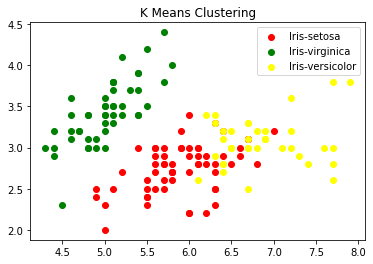

In [20]:
plt.title('K Means Clustering')
plt.scatter(x[y_predict==0,0],x[y_predict==0,1],c='red',label='Iris-setosa')
plt.scatter(x[y_predict==1,0],x[y_predict==1,1],c='green',label='Iris-virginica')
plt.scatter(x[y_predict==2,0],x[y_predict==2,1],c='yellow',label='Iris-versicolor')
plt.legend(loc='best')